# HANDWRITTEN DIGIT CLASSIFICAITON

### IGNORING WARNINGS

In [1]:
from warnings import filterwarnings
filterwarnings ('ignore')

### READING THE HANDWRITTEN DIGIT DATASET

In [2]:
from keras.datasets import mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [3]:
xtrain.shape

(60000, 28, 28)

In [4]:
xtest.shape

(10000, 28, 28)

In [5]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
ytrain.shape

(60000,)

In [7]:
ytest.shape

(10000,)

In [8]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### VIEWING FIRST IMAGE FROM TRAIN DATA

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

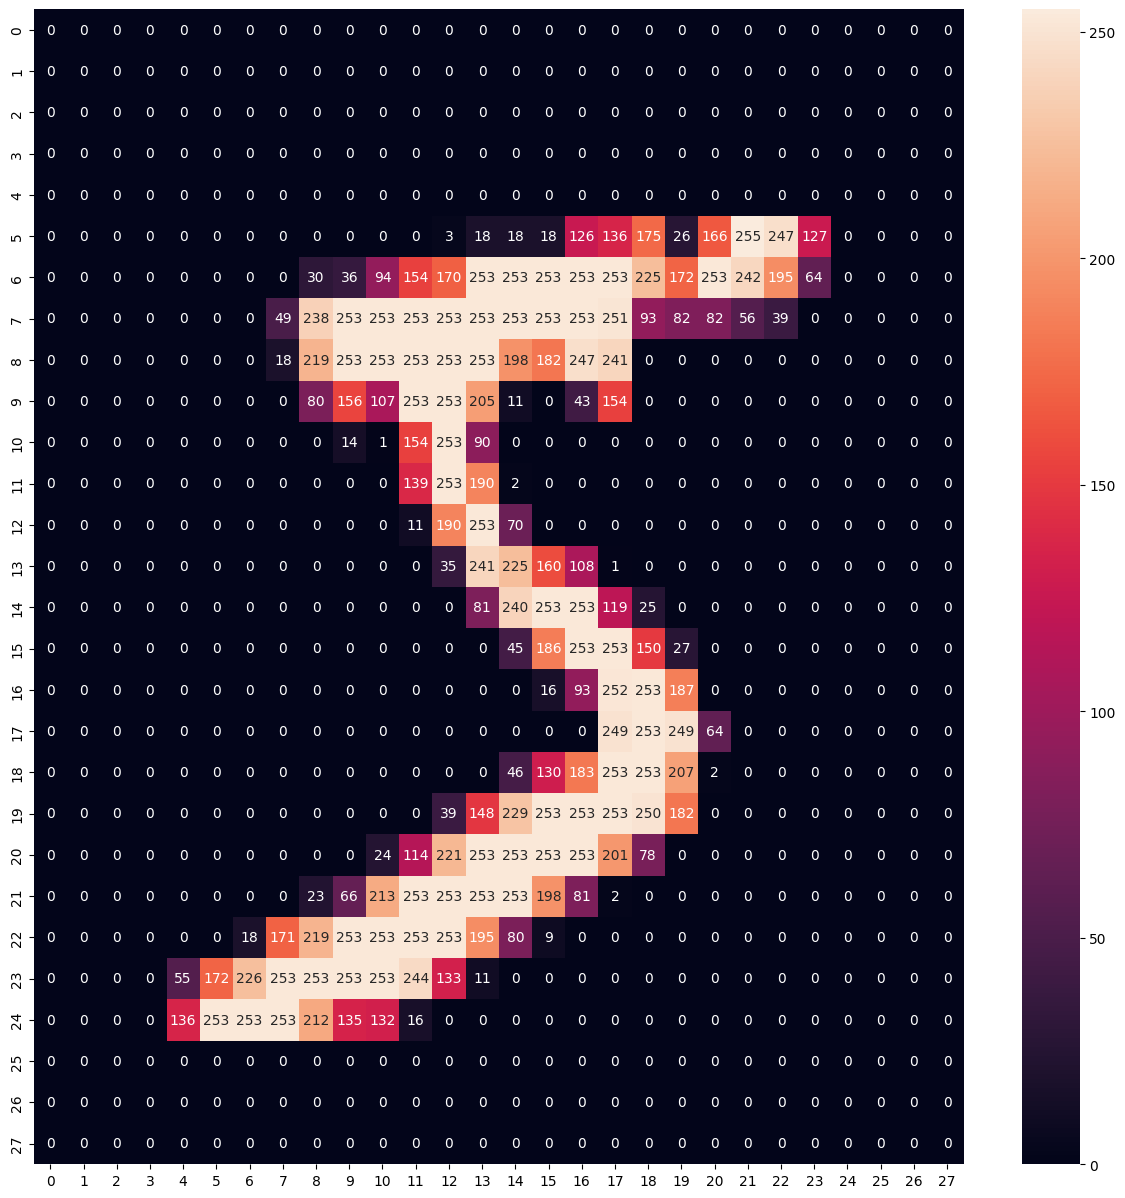

In [10]:
plt.figure (figsize=(15,15))
sns.heatmap(xtrain[0], annot=True, fmt='d')
plt.show()

In [11]:
ytrain[0]

5

In [12]:
xtrain[0].shape

(28, 28)

### VISUALIZING TOP 9 IMAGES FROM XTRAIN DATA

In [13]:
for i in range (9):
    print(i)

0
1
2
3
4
5
6
7
8


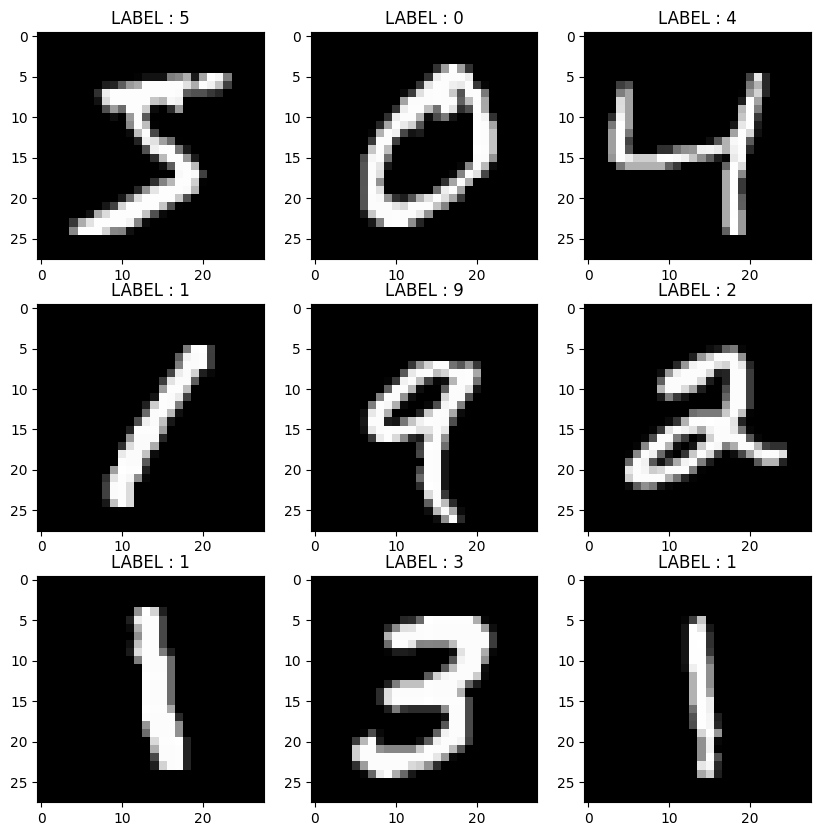

In [14]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3, i+1)
    plt.imshow(xtrain[i], cmap='gray')
    plt.title(f'LABEL : {ytrain[i]}')

# PREPROCESSING THE DATA

In [15]:
# SCALE THE X DATA DIVIDE BY 255
xtrain_scale = xtrain.astype('float32')/255
xtest_scale = xtest.astype('float32')/255

In [16]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [17]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [18]:
ytrain_cat[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [19]:
ytest

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [20]:
ytest_cat[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### CREATING A SIMPLE COVNET

In [21]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dropout, Dense

In [22]:
model = Sequential()

# ADDING INPUT LAYER
model.add(Input(shape=((28, 28, 1))))

# ADDING CONVOLUTION LAYER 1
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))

# ADDING MAXPOOLING 1
model.add(MaxPool2D(pool_size=(2, 2)))

# ADDING CONVOLUTION LAYER 2
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# ADDING MAXPOOLING 2
model.add(MaxPool2D(pool_size=(2, 2)))

# ADDING FLATTEN LAYER
model.add(Flatten())

# ADDING DROPOUT LAYER
model.add(Dropout(rate=0.5))

# ADDING DENSE LAYER MULTICLASS - SOFTMAX
model.add(Dense(units=10, activation='softmax'))


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

### COMPILING THE MODEL

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy' )

### TRAINING THE NEURAL NET

In [25]:
hist = model.fit(xtrain_scale, ytrain_cat, validation_split=0.1, epochs=15)

Epoch 1/15
1688/1688 [==============================] - 63s 36ms/step - loss: 0.2247 - accuracy: 0.9306 - val_loss: 0.0557 - val_accuracy: 0.9838
Epoch 2/15
1688/1688 [==============================] - 51s 30ms/step - loss: 0.0863 - accuracy: 0.9729 - val_loss: 0.0457 - val_accuracy: 0.9872
Epoch 3/15
1688/1688 [==============================] - 47s 28ms/step - loss: 0.0673 - accuracy: 0.9789 - val_loss: 0.0417 - val_accuracy: 0.9877
Epoch 4/15
1688/1688 [==============================] - 53s 31ms/step - loss: 0.0554 - accuracy: 0.9830 - val_loss: 0.0360 - val_accuracy: 0.9893
Epoch 5/15
1688/1688 [==============================] - 51s 30ms/step - loss: 0.0487 - accuracy: 0.9854 - val_loss: 0.0327 - val_accuracy: 0.9908
Epoch 6/15
1688/1688 [==============================] - 52s 31ms/step - loss: 0.0454 - accuracy: 0.9857 - val_loss: 0.0343 - val_accuracy: 0.9907
Epoch 7/15
1688/1688 [==============================] - 58s 34ms/step - loss: 0.0423 - accuracy: 0.9865 - val_loss: 0.0345 -

### PLOTTING THELEARNING CURVE 

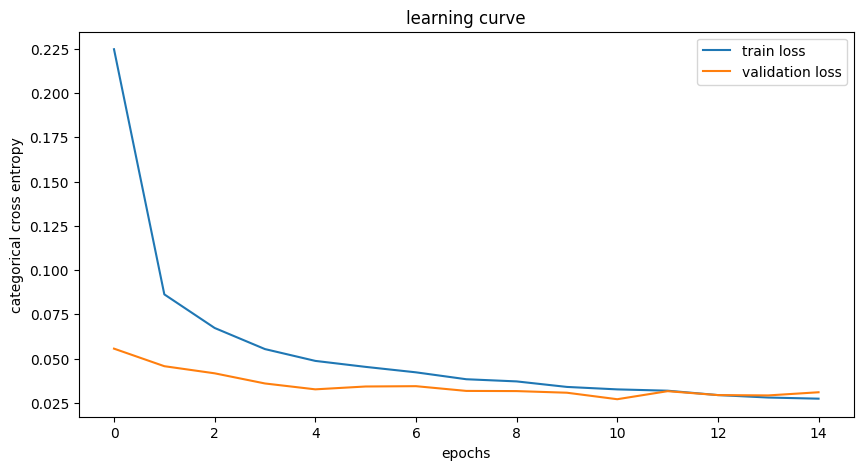

In [28]:
plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('categorical cross entropy')
plt.title('learning curve')
plt.legend()
plt.show()

### EVALUATING MODEL IN TRAIN AND TEST

In [29]:
model.evaluate(xtrain_scale, ytrain_cat)

1875/1875 [==============================] - 22s 12ms/step - loss: 0.0120 - accuracy: 0.9962


[0.0120186572894454, 0.9962000250816345]

In [30]:
model.evaluate(xtest_scale, ytest_cat)

313/313 [==============================] - 6s 16ms/step - loss: 0.0232 - accuracy: 0.9929


[0.02317866124212742, 0.992900013923645]

### PREDICTING THE PROBABILITY

In [31]:
yprob_train = model.predict(xtrain_scale)
yprob_test = model.predict(xtest_scale)

313/313 [==============================] - 6s 17ms/step


In [32]:
yprob_train[0:5]

array([[5.2751623e-12, 6.5883648e-12, 4.6849073e-11, 3.8287850e-04,
        5.2408683e-14, 9.9961686e-01, 1.2618826e-12, 1.1420940e-09,
        2.2475797e-07, 6.7098711e-08],
       [9.9999976e-01, 1.4541865e-15, 1.6022118e-07, 3.0734955e-12,
        4.1544455e-11, 5.2217165e-11, 1.0409507e-07, 3.1866408e-12,
        3.6415064e-09, 2.1092402e-08],
       [4.5919710e-16, 1.5605650e-08, 3.8959333e-10, 9.6471910e-12,
        9.9999881e-01, 1.6279231e-12, 3.3353411e-12, 1.1893230e-06,
        4.0380792e-09, 1.9485215e-08],
       [1.1278210e-08, 9.9991691e-01, 1.1993795e-06, 9.4436334e-12,
        6.9677008e-05, 9.8209596e-10, 1.2631744e-08, 1.0817119e-05,
        1.2702911e-06, 4.2035135e-09],
       [4.7991504e-13, 1.0373988e-12, 4.7280807e-10, 1.1052806e-09,
        5.5685372e-04, 3.8936440e-10, 3.3146934e-14, 3.9444566e-07,
        8.7179533e-06, 9.9943405e-01]], dtype=float32)

In [33]:
yprob_train[0]

array([5.2751623e-12, 6.5883648e-12, 4.6849073e-11, 3.8287850e-04,
       5.2408683e-14, 9.9961686e-01, 1.2618826e-12, 1.1420940e-09,
       2.2475797e-07, 6.7098711e-08], dtype=float32)

### PREDICTIONS FOR TRAIN AND TEST

In [34]:
import numpy as np
ypred_train = np.argmax(yprob_train, axis=1)
ypred_test = np.argmax(yprob_test, axis=1)

In [35]:
ypred_train[0:5]

array([5, 0, 4, 1, 9], dtype=int64)

In [37]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [38]:
ypred_test[0:5]

array([7, 2, 1, 0, 4], dtype=int64)

In [39]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

### PLOTTING THE CONFUSION MATRIX

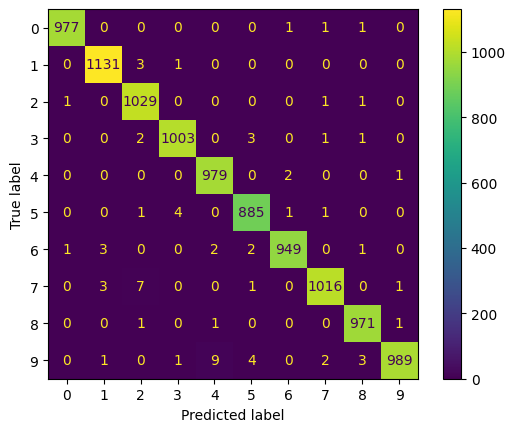

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_test)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

### PRINTING THE CLASSIFICATION REPORT

In [42]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      1.00      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### SAVING THE KERAS MODEL FOR FUTURE USE

In [43]:
model.save('HAND WRITTEN MODEL.keras')

### LOADING THE ABOVE MODEL

In [44]:
from keras.models import load_model
m = load_model('HAND WRITTEN MODEL.keras')
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0